# RGI01 (Alaska)

F. Maussion & S. Galos

Goal: strictly equivalent to RGI6

In [1]:
import pandas as pd
import geopandas as gpd
import subprocess
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from utils import mkdir, submission_summary, needs_size_filter, size_filter, plot_map, plot_date_hist
import os

In [2]:
# Region of interest
reg = 1

# go down from rgi7_scripts/workflow
data_dir = '../../rgi7_data/'

# Level 2 GLIMS files
l2_dir = os.path.join(data_dir, 'l2_sel_reg_tars')

# Output directories
output_dir = mkdir(os.path.join(data_dir, 'l3_rgi7a'))
output_dir_tar = mkdir(os.path.join(data_dir, 'l3_rgi7a_tar'))

# RGI v6 file for comparison later 
rgi6_reg_file = os.path.join(data_dir, 'l0_RGIv6', '01_rgi60_Alaska.zip')

In [3]:
# Read L2 files
shp = gpd.read_file('tar://' + os.path.join(l2_dir, f'RGI{reg:02d}.tar.gz/RGI{reg:02d}/RGI{reg:02d}.shp'))

### List of submissions 

In [4]:
sdf, df_class = submission_summary(shp)
# There are loads of small submissions in this region
sdf.loc[sdf.N > 1]

,N,A,analysts,submitters,release_date,geog_area,src_date_mode,src_date_min,src_date_max
subm_id,,,,,,,,,
324,36,112.5,Beedle,Beedle,2006,Various (NSIDC),2001,2001,2001
434,2,3629.6,Beedle,Beedle,2007,Various (NSIDC),2001,2001,2001
457,2,126.2,Beedle,Beedle,2007,Various (NSIDC),2001,2001,2001
458,2,359.0,Beedle,Beedle,2007,Various (NSIDC),2001,2001,2001
539,311,1240.1,Manley,Racoviteanu,2009,Alaska,1954,1948,1954
541,116,5236.1,Herreid,Arendt,2010,Alaska,2007,2007,2007
543,310,1675.9,Herreid,Arendt,2010,Alaska,2005,2005,2005
551,779,3828.5,Herreid,Arendt,2011,Alaska,2003,2003,2003
620,8827,16219.1,"Frey, Le Bris, Paul",Paul,2010,Various (GlobGlacier),2007,2005,2009


In [5]:
# # Optional: write out selection in intermediate shape files for manual GIS review
# tmp_output_dir = mkdir(os.path.join(data_dir, 'l0_tmp_data', f'rgi{reg:02d}_inventories'))
# tmp_output_dir_tar = mkdir(os.path.join(data_dir, 'l0_tmp_data'))
# for subid in shp.subm_id.unique():
#     s_loc = shp.loc[shp.subm_id == subid]
#     s_loc.to_file(tmp_output_dir + f'/subm_{int(subid):03d}.shp')
# print('Taring...')
# print(subprocess.run(['tar', '-zcvf', f'{tmp_output_dir_tar}/rgi{reg:02d}_inventories.tar.gz', '-C', 
#                       os.path.join(data_dir, 'l0_tmp_data'), f'rgi{reg:02d}_inventories']))

## Outline selection 

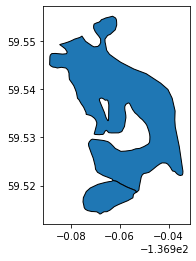

In [6]:
# This is the corrected outline in GLIMS
shp.loc[shp.subm_id.isin([747])].plot(edgecolor='k');

# This was the outline Bruce thought was ok - but its not. See https://trello.com/c/K73A6c2k
# shp.loc[shp.anlys_id.isin([373863])].plot(edgecolor='k');

In [7]:
# 747 is for the corrected outline
rgi7 = shp.loc[shp.subm_id.isin([624, 747])].copy()

In [8]:
# Size filter?
needs_size_filter(rgi7)

False

### Some sanity checks 

In [9]:
sdf, df_class = submission_summary(rgi7)
df_class

,N,N NA
subm_id,,
624,27104,27104
747,2,2


In [10]:
# Nothing should change here
rgi7['is_rgi6'] = True

In [11]:
# Check the orphaned rock outcrops
orphan_f = os.path.join(data_dir, 'l1_orphan_interiors', f'RGI{reg:02d}', f'RGI{reg:02d}.shp')
if os.path.exists(orphan_f):
    orphan_f = gpd.read_file(orphan_f)
    if np.any(np.isin(rgi7.subm_id.unique(), orphan_f.subm_id.unique())):
        print('Orphan rock outcrops detected.')

### Plots 

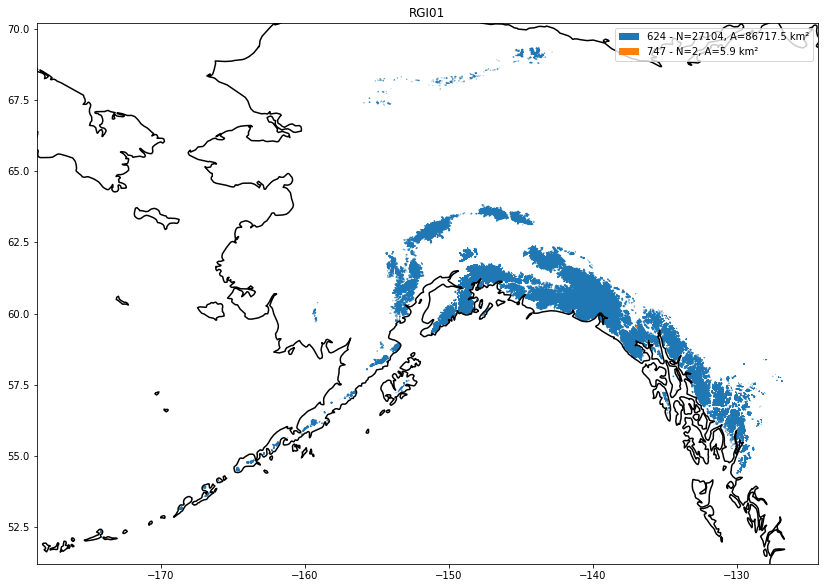

In [12]:
plot_map(rgi7, reg)

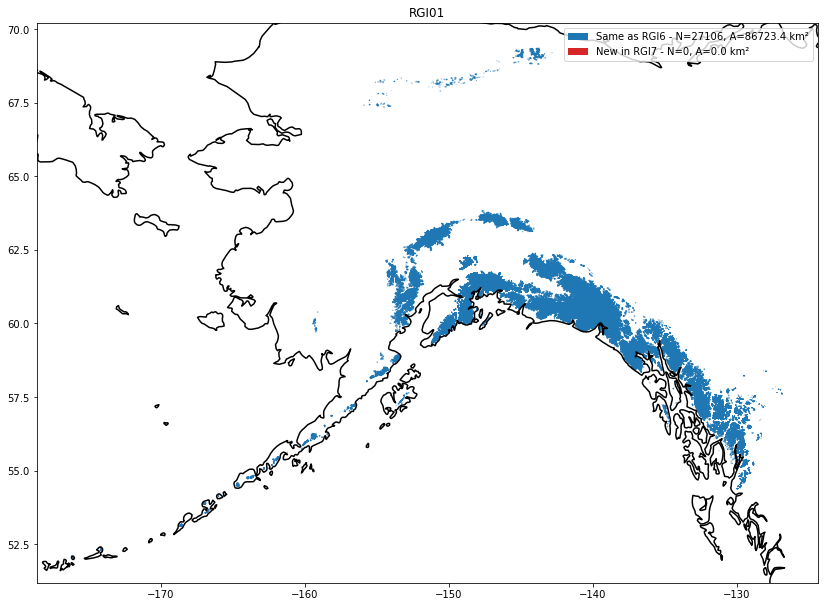

In [13]:
plot_map(rgi7, reg, is_rgi6=True)

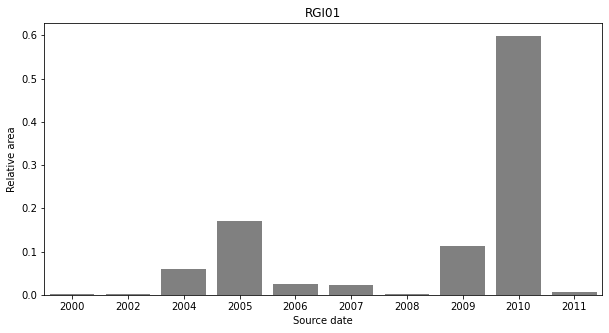

In [14]:
plot_date_hist(rgi7, reg)

### Text for github

In [15]:
fgh = sdf.T
fgh

subm_id,624,747
N,27104,2
A,86717.5,5.9
analysts,"Beedle, Berthier, Bolch, Burgess, Cogley, Fors...","Beedle, Berthier, Bolch, Burgess, Cogley, Fors..."
submitters,Cogley,Bolch
release_date,2015,2021
geog_area,Randolph Glacier Inventory; Umbrella RC for me...,Randolph Glacier Inventory; Umbrella RC for me...
src_date_mode,2010,2010
src_date_min,2000,2010
src_date_max,2011,2010


In [16]:
print(fgh.to_markdown(headers=np.append(['subm_id'], fgh.columns)))

| subm_id       | 624                                                                                       | 747                                                                                       |
|:--------------|:------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------|
| N             | 27104                                                                                     | 2                                                                                         |
| A             | 86717.5                                                                                   | 5.9                                                                                       |
| analysts      | Beedle, Berthier, Bolch, Burgess, Cogley, Forster, Giffen, Hall, Kienholz, LeBris, Manley | Beedle, Berthier, Bolch, Burgess, Cogley, Forster, Giffen, Hall, Kienholz, LeBris,

## Write out and tar 

In [17]:
dd = mkdir(f'{output_dir}/RGI{reg:02d}/', reset=True)

print('Writing...')
rgi7.to_file(dd + f'RGI{reg:02d}.shp')

print('Taring...')
print(subprocess.run(['tar', '-zcvf', f'{output_dir_tar}/RGI{reg:02d}.tar.gz', '-C', output_dir, f'RGI{reg:02d}']))

Writing...
Taring...
CompletedProcess(args=['tar', '-zcvf', '../../rgi7_data/l3_rgi7a_tar/RGI01.tar.gz', '-C', '../../rgi7_data/l3_rgi7a', 'RGI01'], returncode=0)


## Consistency check with RGI6 

In [18]:
# load reference data
from utils import open_zip_shapefile
rgi6 = open_zip_shapefile(rgi6_reg_file)

In [19]:
len(rgi7), len(rgi6)

(27106, 27108)

One has been wrongly attributed to Region 1 in RGI6 (`RGI60-01.05285`)

In [20]:
# Remove wrongly attributed glacier from RGI6
rgi6 = rgi6.loc[rgi6.RGIId != 'RGI60-01.05285'].copy()

Test the areas:

In [21]:
rgi6['Area_us'] = rgi6.to_crs({'proj':'cea'}).area 
rgi7['area'] = rgi7.to_crs({'proj':'cea'}).area 

In [22]:
print('Area RGI7a (km2)', rgi7['area'].sum() * 1e-6)
print('Area RGI6 (km2)', rgi6['Area'].sum())
print('Area RGI6 computed by us (km2)', rgi6['Area_us'].sum() * 1e-6)
print('diff areas RGI6 - RGI7 computed by us (km2)', (rgi6['Area_us'].sum() - rgi7['area'].sum()) * 1e-6)

Area RGI7a (km2) 86723.36469160396
Area RGI6 (km2) 86724.631
Area RGI6 computed by us (km2) 86724.5515302422
diff areas RGI6 - RGI7 computed by us (km2) 1.1868386382446288


So, the difference is really small... BUT this one glacier missing is intriging and has been reported to GLIMS: https://trello.com/c/9yUMSONP/186-new-missing-geometry-in-alaska

### Code below is now obsolete! GLIMS issue fixed 

### Find the missing glacier 

In [ ]:
df_ref = rgi6.copy()
df_ref['area'] = rgi6['Area_us'] 

In [ ]:
import progressbar

In [ ]:
def xy_coord(geom):
    """To compute CenLon CenLat ourselves"""
    x, y = geom.xy
    return x[0], y[0]

In [ ]:
# compute CenLon CenLat ourselves
rp = df_ref.representative_point()

coordinates = np.array(list(rp.apply(xy_coord)))
df_ref['CenLon'] = coordinates[:, 0]
df_ref['CenLat'] = coordinates[:, 1]

In [ ]:
df_ref_orig = df_ref.copy()

In [ ]:
# Loop over all RGI7 glaciers and find their equivalent in ref
df_ref = df_ref_orig.copy()
not_found = {}
to_drop = []
for i, (ref_area, lon, lat) in progressbar.progressbar(enumerate(zip(rgi7['area'].values, rgi7.CenLon.values, rgi7.CenLat.values)), max_value=len(rgi7)):
#     dist = haversine(lon, lat, df_ref.CenLon.values, df_ref.CenLat.values)
    dist = (lon - df_ref.CenLon.values)**2 + (lat - df_ref.CenLat.values)**2 
    found = False
    for j in np.argsort(dist)[:10]:
        s6 = df_ref.iloc[j]
        if np.allclose(s6['area'], ref_area, rtol=0.001):
            found = True
            to_drop.append(s6.name)
            break
    if not found:
        not_found[i] = df_ref.iloc[np.argsort(dist)[:10]]
    if len(to_drop) > 1000:
        df_ref.drop(labels=to_drop, inplace=True)
        to_drop = []
df_ref.drop(labels=to_drop, inplace=True)

In [ ]:
print(len(not_found), len(df_ref))

In [ ]:
df_ref

In [ ]:
rgi6.loc[rgi6.RGIId.isin(['RGI60-01.20630', 'RGI60-01.25912', 'RGI60-01.25913'])].plot(edgecolor='k');

In [ ]:
pb_rgi7 = rgi7.iloc[list(not_found.keys())]

In [ ]:
pb_rgi7

In [ ]:
pb_rgi7.plot(edgecolor='k');

In [ ]:
df_ref

In [ ]:
df_ref.plot(edgecolor='k');

We have found the problem! Reported here: https://github.com/GLIMS-RGI/glims_issue_tracker/issues/5

In [ ]:
pb_rgi7.buffer(0).plot(edgecolor='k');

In [ ]:
# Output directories
output_dir = mkdir(os.path.join(data_dir, 'l3_problem_glaciers'))
output_dir_tar = mkdir(os.path.join(data_dir, 'l3_problem_glaciers_tar'))

In [ ]:
dd = mkdir(f'{output_dir}/RGI{reg:02d}/', reset=True)

print('Writing...')
rgi6.loc[rgi6.RGIId.isin(['RGI60-01.20630', 'RGI60-01.25912', 'RGI60-01.25913'])].to_file(dd + f'RGI{reg:02d}_ref.shp')

print('Taring...')
print(subprocess.run(['tar', '-zcvf', f'{output_dir_tar}/RGI{reg:02d}.tar.gz', '-C', output_dir, f'RGI{reg:02d}']))